In [15]:
from vasppy.rdf import RadialDistributionFunction
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.io.vasp import Xdatcar
from pymatgen.core import Structure, Lattice
from pymatgen.io.ase import AseAtomsAdaptor
import pickle
from ase.atoms import Atoms, units 
import numpy as np 
import json, os
from ase.optimize import LBFGS, FIRE, BFGS, MDMin, QuasiNewton
from ase.optimize.precon import PreconLBFGS, PreconFIRE
from mace.calculators import MACECalculator
from ase.filters import FrechetCellFilter

In [16]:
# load in the initial structure 
#job_name ='supercell_gen0_comp10_struct1_vac_site0_start'
job_name = 'supercell_gen4_comp44_struct2_vac_site0_start'
#initial_structure = Structure.from_file(f'../Archived_Vasp_Jobs/Vacancies/{job_name}/POSCAR')
#xdatcar = Xdatcar(f'../Archived_Vasp_Jobs/VCrTiWZr_Summit/Vacancies/Post_VASP/{job_name}/XDATCAR-4') # change to 4 for the 4th gen
initial_structure = Structure.from_file(f'../Archived_Vasp_Jobs/VCrTiWZr_Summit/Fixed-Encut-KPoints/Post_VASP/gen4-vac/{job_name}/POSCAR-1')
xdatcar = Xdatcar(f'../Archived_Vasp_Jobs/VCrTiWZr_Summit/Fixed-Encut-KPoints/Post_VASP/gen4-vac/{job_name}/XDATCAR-9')
final_structure_vasp = xdatcar.structures[-1]

In [17]:

def mace_relaxer(atoms, model_path, fmax = 0.01, steps = 250, relax_cell=True, optimizer = 'LBFGS', device='cpu', default_dtype='float64'):
    if isinstance(atoms, Structure):
        atoms = AseAtomsAdaptor.get_atoms(atoms)
    new_atoms = atoms.copy()
    new_atoms.calc = MACECalculator(model_paths=[model_path], device=device, default_dtype=default_dtype)

    if relax_cell:
        ucf = FrechetCellFilter(new_atoms)
        #obs = TrajectoryObserver(ucf)
        if optimizer == 'LBFGS':
            optimizer = LBFGS(ucf)
        elif optimizer == 'BFGS':
            optimizer = BFGS(ucf)
        elif optimizer == 'MDMin':
            optimizer = MDMin(ucf)
        elif optimizer == 'QuasiNewton':
            optimizer = QuasiNewton(ucf)
        elif optimizer == 'FIRE':
            optimizer = FIRE(ucf)
        elif optimizer == 'PreconFIRE':
            optimizer = PreconFIRE(ucf)
        elif optimizer == 'PreconLBFGS':
            optimizer = PreconLBFGS(ucf)
        #optimizer.attach(obs, interval=loginterval)

    else:
        #constraints = FixAtoms(mask=[False] * len(new_atoms))  # Allow all atoms to move
        # Add constraints to atoms
        #new_atoms.set_constraint(constraints)
        ucf = new_atoms
        if optimizer == 'LBFGS':
            optimizer = LBFGS(ucf)
        elif optimizer == 'BFGS':
            optimizer = BFGS(ucf)
        elif optimizer == 'MDMin':
            optimizer = MDMin(ucf)
        elif optimizer == 'QuasiNewton':
            optimizer = QuasiNewton(ucf)
        elif optimizer == 'FIRE':
            optimizer = FIRE(ucf)
        elif optimizer == 'PreconFIRE':
            optimizer = PreconFIRE(ucf)
        elif optimizer == 'PreconLBFGS':
            optimizer = PreconLBFGS(ucf)

        #obs = TrajectoryObserver(atoms)
        #optimizer.attach(obs, interval=loginterval)

    optimizer.run(fmax=fmax, steps=steps)
    return new_atoms

In [18]:
potential_path = '../Potentials/vcrtiwzr_vac_r6_e1_f25_s100_L2_stagetwo_compiled.model'
# now get final structure frim mace 
final_structure_mace = AseAtomsAdaptor.get_structure(mace_relaxer(AseAtomsAdaptor.get_atoms(initial_structure), 
                                    model_path= potential_path,
                                    fmax=0.01, 
                                    steps=1000, 
                                    relax_cell=False, 
                                    optimizer='PreconLBFGS'))

/opt/homebrew/Caskroom/miniforge/base/envs/allegro/lib/python3.10/site-packages/torch/serialization.py:779: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


PreconLBFGS:   0  11:09:49    -1179.311472       1.3151
PreconLBFGS:   1  11:09:53    -1179.462317       1.0669
PreconLBFGS:   2  11:09:54    -1179.583005       0.9006
PreconLBFGS:   3  11:09:55    -1179.675333       0.7632
PreconLBFGS:   4  11:09:56    -1179.746530       0.6429
PreconLBFGS:   5  11:09:57    -1179.802157       0.5371
PreconLBFGS:   6  11:09:58    -1179.845965       0.4490
PreconLBFGS:   7  11:09:59    -1179.880491       0.3750
PreconLBFGS:   8  11:10:00    -1179.907563       0.3029
PreconLBFGS:   9  11:10:00    -1179.928539       0.2319
PreconLBFGS:  10  11:10:01    -1179.944540       0.1726
PreconLBFGS:  11  11:10:02    -1179.956563       0.1268
PreconLBFGS:  12  11:10:03    -1179.965476       0.0887
PreconLBFGS:  13  11:10:04    -1179.971983       0.0774
PreconLBFGS:  14  11:10:05    -1179.978337       0.0640
PreconLBFGS:  15  11:10:05    -1179.980650       0.0465
PreconLBFGS:  16  11:10:06    -1179.984205       0.0261
PreconLBFGS:  17  11:10:07    -1179.985807      

ERROR:ase.utils.linesearcharmijo:Passed direction which is not downhill. Aborting...: 6.033113e-02


PreconLBFGS:  64  11:10:47    -1180.134364       0.2210


/opt/homebrew/Caskroom/miniforge/base/envs/allegro/lib/python3.10/site-packages/ase/optimize/precon/lbfgs.py:340: UserWarning: Armijo linesearch failed, resetting Hessian and trying again
  warnings.warn(


PreconLBFGS:  65  11:10:48    -1180.154852       0.2562
PreconLBFGS:  66  11:10:49    -1180.190342       0.3378
PreconLBFGS:  67  11:10:50    -1180.215882       0.3693
PreconLBFGS:  68  11:10:51    -1180.235013       0.3270
PreconLBFGS:  69  11:10:51    -1180.249299       0.2412
PreconLBFGS:  70  11:10:52    -1180.271665       0.2934
PreconLBFGS:  71  11:10:53    -1180.285499       0.3223
PreconLBFGS:  72  11:10:54    -1180.299989       0.3386
PreconLBFGS:  73  11:10:55    -1180.314570       0.3487
PreconLBFGS:  74  11:10:56    -1180.329305       0.3547
PreconLBFGS:  75  11:10:57    -1180.344449       0.3560
PreconLBFGS:  76  11:10:58    -1180.360177       0.3522
PreconLBFGS:  77  11:10:58    -1180.376478       0.3440
PreconLBFGS:  78  11:10:59    -1180.393206       0.3333
PreconLBFGS:  79  11:11:00    -1180.410147       0.3224
PreconLBFGS:  80  11:11:01    -1180.427105       0.3129
PreconLBFGS:  81  11:11:02    -1180.443983       0.3256
PreconLBFGS:  82  11:11:03    -1180.460725      

ERROR:ase.utils.linesearcharmijo:Passed direction which is not downhill. Aborting...: 1.887776e-04


PreconLBFGS: 100  11:11:18    -1180.681511       0.6370
PreconLBFGS: 101  11:11:19    -1180.681927       0.6369
PreconLBFGS: 102  11:11:19    -1180.682758       0.6364
PreconLBFGS: 103  11:11:20    -1180.684417       0.6354
PreconLBFGS: 104  11:11:21    -1180.687730       0.6334
PreconLBFGS: 105  11:11:22    -1180.694328       0.6293
PreconLBFGS: 106  11:11:23    -1180.707421       0.6207
PreconLBFGS: 107  11:11:24    -1180.733199       0.6010
PreconLBFGS: 108  11:11:25    -1180.782949       0.5495
PreconLBFGS: 109  11:11:25    -1180.839349       0.4693
PreconLBFGS: 110  11:11:26    -1180.890096       0.3779
PreconLBFGS: 111  11:11:27    -1180.934852       0.2748
PreconLBFGS: 112  11:11:28    -1180.973264       0.1712
PreconLBFGS: 113  11:11:29    -1181.004782       0.1577
PreconLBFGS: 114  11:11:30    -1181.028698       0.1546
PreconLBFGS: 115  11:11:30    -1181.047524       0.1433
PreconLBFGS: 116  11:11:31    -1181.053603       0.1166
PreconLBFGS: 117  11:11:32    -1181.063476      

In [7]:
print(initial_structure.composition)

Zr29 Ti9 V50 Cr9 W27


In [19]:
vasp_indices_v = [i for i, site in enumerate(final_structure_vasp) if site.species_string == 'V']
vasp_indices_cr = [i for i, site in enumerate(final_structure_vasp) if site.species_string == 'Cr']
vasp_indices_ti = [i for i, site in enumerate(final_structure_vasp) if site.species_string == 'Ti']
vasp_indices_w = [i for i, site in enumerate(final_structure_vasp) if site.species_string == 'W']
vasp_indices_zr = [i for i, site in enumerate(final_structure_vasp) if site.species_string == 'Zr']

mace_indices_v = [i for i, site in enumerate(final_structure_mace) if site.species_string == 'V']
mace_indices_cr = [i for i, site in enumerate(final_structure_mace) if site.species_string == 'Cr']
mace_indices_ti = [i for i, site in enumerate(final_structure_mace) if site.species_string == 'Ti']
mace_indices_w = [i for i, site in enumerate(final_structure_mace) if site.species_string == 'W']
mace_indices_zr = [i for i, site in enumerate(final_structure_mace) if site.species_string == 'Zr']

In [21]:
from vasppy.rdf import RadialDistributionFunction


vasp_rdf_vv = RadialDistributionFunction(structures=[final_structure_vasp],
                                      indices_i=vasp_indices_v)
vasp_rdf_crcr = RadialDistributionFunction(structures=[final_structure_vasp],
                                      indices_i=vasp_indices_cr)
vasp_rdf_titi = RadialDistributionFunction(structures=[final_structure_vasp],
                                        indices_i=vasp_indices_ti)
vasp_rdf_ww = RadialDistributionFunction(structures=[final_structure_vasp],
                                        indices_i=vasp_indices_w)
vasp_rdf_zrzr = RadialDistributionFunction(structures=[final_structure_vasp],
                                        indices_i=vasp_indices_zr)

mace_rdf_vv = RadialDistributionFunction(structures=[final_structure_mace],
                                      indices_i=mace_indices_v)
mace_rdf_crcr = RadialDistributionFunction(structures=[final_structure_mace],
                                      indices_i=mace_indices_cr)
mace_rdf_titi = RadialDistributionFunction(structures=[final_structure_mace],
                                        indices_i=mace_indices_ti)
mace_rdf_ww = RadialDistributionFunction(structures=[final_structure_mace],
                                        indices_i=mace_indices_w)
mace_rdf_zrzr = RadialDistributionFunction(structures=[final_structure_mace],
                                        indices_i=mace_indices_zr)

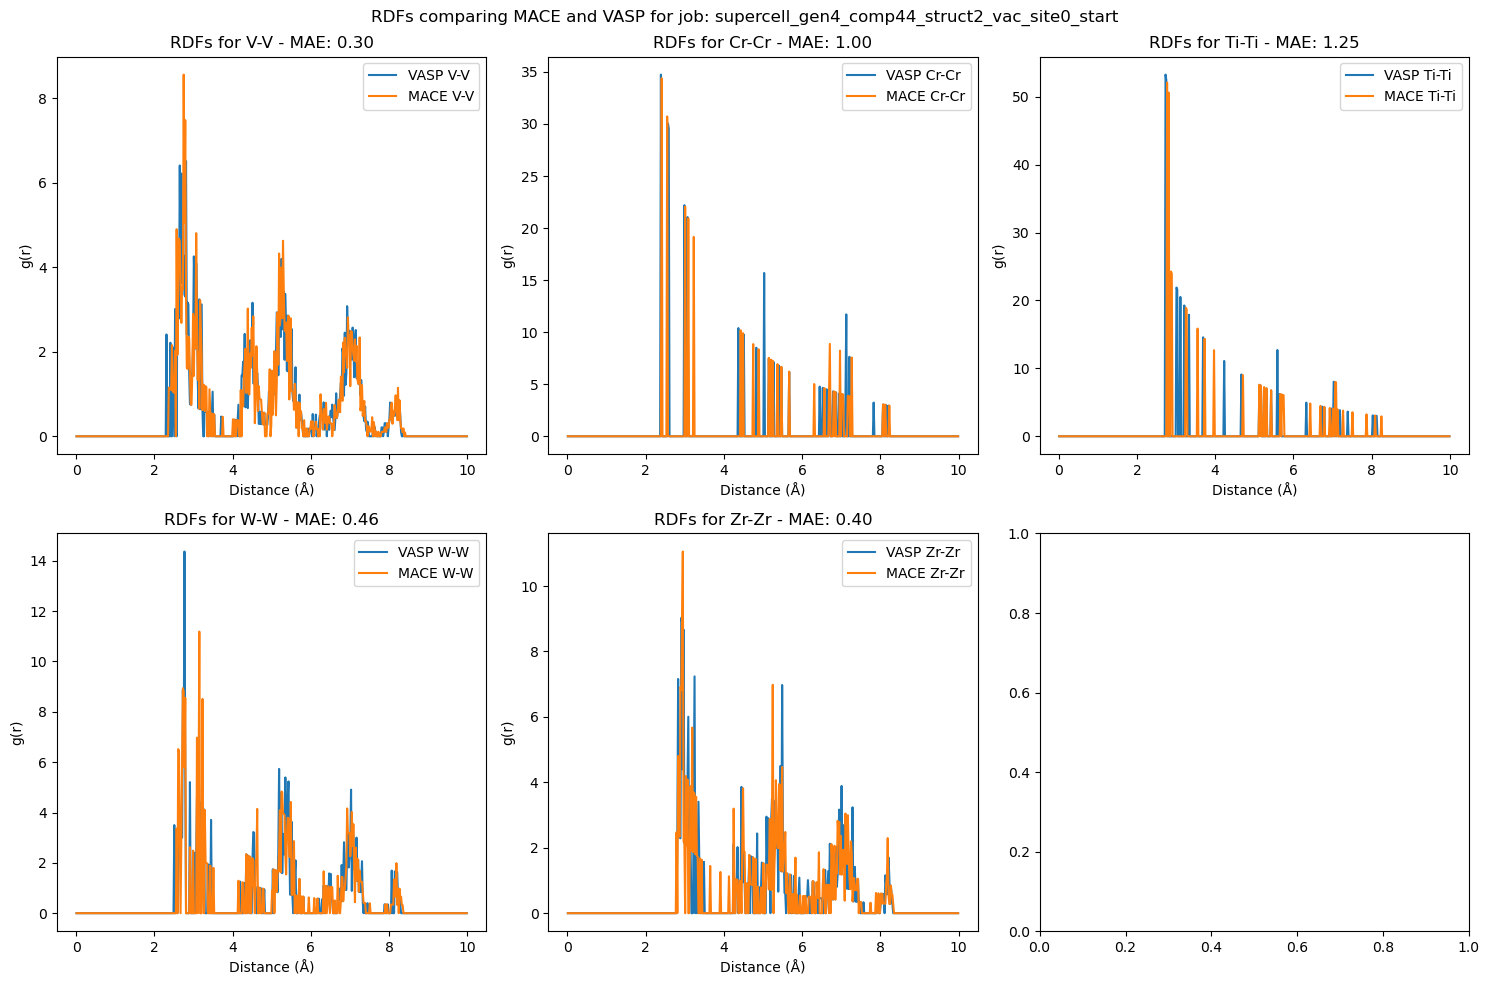

In [22]:
# Create a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
labels = ['V-V', 'Cr-Cr', 'Ti-Ti', 'W-W', 'Zr-Zr']
rdf_pairs = [(vasp_rdf_vv, mace_rdf_vv), (vasp_rdf_crcr, mace_rdf_crcr), (vasp_rdf_titi, mace_rdf_titi), 
             (vasp_rdf_ww, mace_rdf_ww), (vasp_rdf_zrzr, mace_rdf_zrzr)]

# Calculate MAE and plot RDFs for each element pair
for i, (label, (rdf_vasp, rdf_mace)) in enumerate(zip(labels, rdf_pairs)):
    # Determine subplot position
    row = i // 3
    col = i % 3
    
    # Select the subplot
    ax = axs[row, col]
    
    # Calculate Mean Absolute Error
    mae = np.mean(np.abs(rdf_vasp.rdf - rdf_mace.rdf))
    
    # Set the subplot title and labels
    ax.set_title(f"RDFs for {label} - MAE: {mae:.2f}")
    ax.set_xlabel("Distance (Å)")
    ax.set_ylabel("g(r)")
    
    # Plot VASP and MACE RDFs
    ax.plot(rdf_vasp.r, rdf_vasp.rdf, label=f"VASP {label}")
    ax.plot(rdf_mace.r, rdf_mace.rdf, label=f"MACE {label}")
    
    # Add legend to the subplot
    ax.legend()

# Add a common title to all subplots
fig.suptitle(f"RDFs comparing MACE and VASP for job: {job_name}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
from ase.io import read, write
# print the energy over time 
job_path = f'../Archived_Vasp_Jobs/VCrTiWZr_Summit/Fixed-Encut-KPoints/Post_VASP/gen4-vac/{job_name}'

# now get the atoms from each OUTCAR-* file in the job_path 
atoms_list = []

# get all the OUTCAR- files in the job_path
outcar_files = [f for f in os.listdir(job_path) if 'OUTCAR-' in f]

# get the energy from each step of the realaxation for every OUTCAR- file using ase 
for outcar_file in outcar_files:
    # get the atoms from the OUTCAR file 
    atoms = read(f'{job_path}/{outcar_file}', index=':', format='vasp-out')
    # get the energy from the atoms 
    atoms_list.append(atoms)

KeyError: 'Zr_sv/25aed69c'